In [1]:
import stim
import pymatching
import numpy as np
import sinter
from typing import List
import matplotlib.pyplot as plt

In [3]:
def generate_circuit(rounds=1, before_round_data_depolarization= 0.1, before_measure_flip_probability=0.2, after_reset_flip_probability=0.3, after_clifford_depolarization=0.4):
    return f"""# surface_code circuit exercise.
# rounds: {rounds}
# before_round_data_depolarization: {before_round_data_depolarization}
# before_measure_flip_probability: {before_measure_flip_probability}
# after_reset_flip_probability: {after_reset_flip_probability}
# after_clifford_depolarization: {after_clifford_depolarization}
# layout:
# L00 X01 L02 X03 L04 X05 L06
# Z10 d11 Z12 d13 Z14 d15 Z16
# d20 X21 d22 X22 d24 X25 d26
# Z30 d31 Z32 d33 Z34 d35 Z36
# d40 X41 d42 X42 d44 X45 d46
# Z50 d51 Z52 d53 Z54 d55 Z56
# d60 X61 d62 X62 d64 X65 d66
# Legend:
#     d# = data qubit
#     L# = data qubit with logical observable crossing
#     X# = measurement qubit (X stabilizer)
#     Z# = measurement qubit (Z stabilizer)
QUBIT_COORDS(0, 0) 1
QUBIT_COORDS(0, 1) 2
QUBIT_COORDS(0, 2) 3
QUBIT_COORDS(0, 3) 4
QUBIT_COORDS(0, 4) 5
QUBIT_COORDS(0, 5) 6
QUBIT_COORDS(0, 6) 7 
QUBIT_COORDS(1, 0) 8
QUBIT_COORDS(1, 1) 9
QUBIT_COORDS(1, 2) 10
QUBIT_COORDS(1, 3) 11
QUBIT_COORDS(1, 4) 12
QUBIT_COORDS(1, 5) 13
QUBIT_COORDS(1, 6) 14
QUBIT_COORDS(2, 0) 15
QUBIT_COORDS(2, 1) 16
QUBIT_COORDS(2, 2) 17
QUBIT_COORDS(2, 3) 18
QUBIT_COORDS(2, 4) 19
QUBIT_COORDS(2, 5) 20
QUBIT_COORDS(2, 6) 21
QUBIT_COORDS(3, 0) 22
QUBIT_COORDS(3, 1) 23
QUBIT_COORDS(3, 2) 24
QUBIT_COORDS(3, 3) 25
QUBIT_COORDS(3, 4) 26
QUBIT_COORDS(3, 5) 27
QUBIT_COORDS(3, 6) 28
QUBIT_COORDS(4, 0) 29
QUBIT_COORDS(4, 1) 30
QUBIT_COORDS(4, 2) 31
QUBIT_COORDS(4, 3) 32
QUBIT_COORDS(4, 4) 33
QUBIT_COORDS(4, 5) 34
QUBIT_COORDS(4, 6) 35
QUBIT_COORDS(5, 0) 36
QUBIT_COORDS(5, 1) 37
QUBIT_COORDS(5, 2) 38
QUBIT_COORDS(5, 3) 39
QUBIT_COORDS(5, 4) 40
QUBIT_COORDS(5, 5) 41
QUBIT_COORDS(5, 6) 42
QUBIT_COORDS(6, 0) 43
QUBIT_COORDS(6, 1) 44
QUBIT_COORDS(6, 2) 45
QUBIT_COORDS(6, 3) 46
QUBIT_COORDS(6, 4) 47
QUBIT_COORDS(6, 5) 48
QUBIT_COORDS(6, 6) 49
R 1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
X_ERROR({after_reset_flip_probability}) 1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
R 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
X_ERROR({after_reset_flip_probability}) 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
TICK
DEPOLARIZE1({before_round_data_depolarization}) 1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
TICK
# Plaquette Syndromes 
H 2 4 6 16 18 20 30 32 34 44 46 48
DEPOLARIZE1({after_clifford_depolarization}) 2 4 6 16 18 20 30 32 34 44 46 48
TICK
# Plaquette Syndromes triplets
CX 1 2 3 4 5 6 43 44 45 46 47 48
DEPOLARIZE2({after_clifford_depolarization}) 1 2 3 4 5 6 43 44 45 46 47 48
TICK
CX 9 2 11 4 13 6 37 44 39 46 41 48
DEPOLARIZE2({after_clifford_depolarization}) 9 2 11 4 13 6 37 44 39 46 41 48
TICK
CX 3 2 5 4 7 6 45 44 47 46 49 48
DEPOLARIZE2({after_clifford_depolarization}) 3 2 5 4 7 6 45 44 47 46 49 48
TICK
# Plaquette Syndromes quads
CX 9 16 11 18 13 20 23 30 25 32 27 34
DEPOLARIZE2({after_clifford_depolarization}) 9 16 11 18 13 20 23 30 25 32 27 34
TICK
CX 15 16 17 18 19 20 29 30 31 32 33 34
DEPOLARIZE2({after_clifford_depolarization}) 15 16 17 18 19 20 29 30 31 32 33 34
TICK
CX 17 16 19 18 21 20 31 30 33 32 35 34
DEPOLARIZE2({after_clifford_depolarization}) 17 16 19 18 21 20 31 30 33 32 35 34
TICK
CX 23 16 25 18 27 20 37 30 39 32 41 34
DEPOLARIZE2({after_clifford_depolarization}) 23 16 25 18 34 20 37 30 39 32 41 34
TICK
# Vertex Syndromes triplets
CX 1 8 15 22 29 36 7 14 21 28 35 42
DEPOLARIZE2({after_clifford_depolarization}) 1 8 15 22 29 36 7 14 21 28 35 42
TICK 
CX 15 8 29 22 43 36 21 14 35 28 49 42
DEPOLARIZE2({after_clifford_depolarization}) 1 8 15 22 29 36 7 14 21 28 35 42
TICK 
CX 9 8 23 22 37 36 13 14 27 28 41 42
DEPOLARIZE2({after_clifford_depolarization}) 1 8 15 22 29 36 7 14 21 28 35 42
TICK 
# Vertex Syndromes quads
CX 9 10 11 12 23 24 25 26 37 38 39 40
DEPOLARIZE2({after_clifford_depolarization}) 9 10 11 12 23 24 25 26 37 38 39 40
TICK
CX 3 10 5 12 17 24 19 26 31 38 33 40
DEPOLARIZE2({after_clifford_depolarization}) 3 10 5 12 17 24 19 26 31 38 33 40
TICK
CX 11 10 13 12 25 24 27 26 39 38 41 40
DEPOLARIZE2({after_clifford_depolarization}) 11 10 13 12 25 24 27 26 39 38 41 40
TICK
CX 17 10 19 12 31 24 33 26 45 38 47 40
DEPOLARIZE2({after_clifford_depolarization}) 17 10 19 12 31 24 33 26 45 38 47 40
TICK
# Plaquette Syndromes 
H 2 4 6 16 18 20 30 32 34 44 46 48
DEPOLARIZE1({after_clifford_depolarization}) 2 4 6 16 18 20 30 32 34 44 46 48
TICK
# Measure measurement qubits
X_ERROR({before_measure_flip_probability}) 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
MR 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
X_ERROR({after_reset_flip_probability}) 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
# Detect errors using the vertex Syndromes
DETECTOR(1, 0, 0) rec[-21]
DETECTOR(3, 0, 0) rec[-14]
DETECTOR(5, 0, 0) rec[-7]
DETECTOR(1, 2, 0) rec[-20]
DETECTOR(3, 2, 0) rec[-13]
DETECTOR(5, 2, 0) rec[-6]
DETECTOR(1, 4, 0) rec[-19]
DETECTOR(3, 4, 0) rec[-12]
DETECTOR(3, 4, 0) rec[-5]
DETECTOR(1, 6, 0) rec[-18]
DETECTOR(3, 6, 0) rec[-11]
DETECTOR(5, 6, 0) rec[-4]
REPEAT {rounds}""" + "{" + f"""
    TICK
    DEPOLARIZE1({before_round_data_depolarization}) 1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
    TICK
    # Plaquette Syndromes 
    H 2 4 6 16 18 20 30 32 34 44 46 48
    DEPOLARIZE1({after_clifford_depolarization}) 2 4 6 16 18 20 30 32 34 44 46 48
    TICK
    # Plaquette Syndromes triplets
    CX 1 2 3 4 5 6 43 44 45 46 47 48
    DEPOLARIZE2({after_clifford_depolarization}) 1 2 3 4 5 6 43 44 45 46 47 48
    TICK
    CX 9 2 11 4 13 6 37 44 39 46 41 48
    DEPOLARIZE2({after_clifford_depolarization}) 9 2 11 4 13 6 37 44 39 46 41 48
    TICK
    CX 3 2 5 4 7 6 45 44 47 46 49 48
    DEPOLARIZE2({after_clifford_depolarization}) 3 2 5 4 7 6 45 44 47 46 49 48
    TICK
    # Plaquette Syndromes quads
    CX 9 16 11 18 13 20 23 30 25 32 27 34
    DEPOLARIZE2({after_clifford_depolarization}) 9 16 11 18 13 20 23 30 25 32 27 34
    TICK
    CX 15 16 17 18 19 20 29 30 31 32 33 34
    DEPOLARIZE2({after_clifford_depolarization}) 15 16 17 18 19 20 29 30 31 32 33 34
    TICK
    CX 17 16 19 18 21 20 31 30 33 32 35 34
    DEPOLARIZE2({after_clifford_depolarization}) 17 16 19 18 21 20 31 30 33 32 35 34
    TICK
    CX 23 16 25 18 27 20 37 30 39 32 41 34
    DEPOLARIZE2({after_clifford_depolarization}) 23 16 25 18 34 20 37 30 39 32 41 34
    TICK
    # Vertex Syndromes triplets
    CX 1 8 15 22 29 36 7 14 21 28 35 42
    DEPOLARIZE2({after_clifford_depolarization}) 1 8 15 22 29 36 7 14 21 28 35 42
    TICK 
    CX 15 8 29 22 43 36 21 14 35 28 49 42
    DEPOLARIZE2({after_clifford_depolarization}) 1 8 15 22 29 36 7 14 21 28 35 42
    TICK 
    CX 9 8 23 22 37 36 13 14 27 28 41 42
    DEPOLARIZE2({after_clifford_depolarization}) 1 8 15 22 29 36 7 14 21 28 35 42
    TICK 
    # Vertex Syndromes quads
    CX 9 10 11 12 23 24 25 26 37 38 39 40
    DEPOLARIZE2({after_clifford_depolarization}) 9 10 11 12 23 24 25 26 37 38 39 40
    TICK
    CX 3 10 5 12 17 24 19 26 31 38 33 40
    DEPOLARIZE2({after_clifford_depolarization}) 3 10 5 12 17 24 19 26 31 38 33 40
    TICK
    CX 11 10 13 12 25 24 27 26 39 38 41 40
    DEPOLARIZE2({after_clifford_depolarization}) 11 10 13 12 25 24 27 26 39 38 41 40
    TICK
    CX 17 10 19 12 31 24 33 26 45 38 47 40
    DEPOLARIZE2({after_clifford_depolarization}) 17 10 19 12 31 24 33 26 45 38 47 40
    TICK
    # Plaquette Syndromes 
    H 2 4 6 16 18 20 30 32 34 44 46 48
    DEPOLARIZE1({after_clifford_depolarization}) 2 4 6 16 18 20 30 32 34 44 46 48
    TICK
    # Measure measurement qubits
    X_ERROR({before_measure_flip_probability}) 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
    MR 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
    X_ERROR({after_reset_flip_probability}) 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
    # Used for adding time?
    SHIFT_COORDS(0, 0, 1)
    # Detecting errors by comparing to previous shot
    DETECTOR(6, 5, 0) rec[-1] rec[-25]
    DETECTOR(6, 3, 0) rec[-2] rec[-26]
    DETECTOR(6, 1, 0) rec[-3] rec[-27]
    DETECTOR(5, 6, 0) rec[-4] rec[-28]
    DETECTOR(5, 4, 0) rec[-5] rec[-29]
    DETECTOR(5, 2, 0) rec[-6] rec[-30]
    DETECTOR(5, 0, 0) rec[-7] rec[-31]
    DETECTOR(4, 5, 0) rec[-8] rec[-32]
    DETECTOR(4, 3, 0) rec[-9] rec[-33]
    DETECTOR(4, 1, 0) rec[-10] rec[-34]
    DETECTOR(3, 6, 0) rec[-11] rec[-35]
    DETECTOR(3, 4, 0) rec[-12] rec[-36]
    DETECTOR(3, 2, 0) rec[-13] rec[-37]
    DETECTOR(3, 0, 0) rec[-14] rec[-38]
    DETECTOR(2, 5, 0) rec[-15] rec[-39]
    DETECTOR(2, 3, 0) rec[-16] rec[-40]
    DETECTOR(2, 1, 0) rec[-17] rec[-41]
    DETECTOR(1, 6, 0) rec[-18] rec[-42]
    DETECTOR(1, 4, 0) rec[-19] rec[-43]
    DETECTOR(1, 2, 0) rec[-20] rec[-44]
    DETECTOR(1, 0, 0) rec[-21] rec[-45]
    DETECTOR(0, 5, 0) rec[-22] rec[-46]
    DETECTOR(0, 3, 0) rec[-23] rec[-47]
    DETECTOR(0, 1, 0) rec[-24] rec[-48]
"""+"}"+f"""
# Final readout of the 25 data qubits in Z basis as we are using vertex syndromes
X_ERROR({before_measure_flip_probability}) 1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
M 1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
DETECTOR(1, 0, 1) rec[-18] rec[-21] rec[-25] rec[-46]
DETECTOR(3, 0, 1) rec[-11] rec[-14] rec[-18] rec[-39]
DETECTOR(5, 0, 1) rec[-4] rec[-7] rec[-11] rec[-32]
DETECTOR(1, 2, 1) rec[-17] rec[-20] rec[-21] rec[-24] rec[-45]
DETECTOR(3, 2, 1) rec[-10] rec[-13] rec[-14] rec[-17] rec[-38]
DETECTOR(5, 2, 1) rec[-3] rec[-6] rec[-7] rec[-10] rec[-31]
DETECTOR(1, 4, 1) rec[-16] rec[-19] rec[-20] rec[-23] rec[-44]
DETECTOR(3, 4, 1) rec[-9] rec[-12] rec[-13] rec[-16] rec[-37]
DETECTOR(5, 4, 1) rec[-2] rec[-5] rec[-6] rec[-9] rec[-30]
DETECTOR(1, 6, 1) rec[-15] rec[-19] rec[-22] rec[-43]
DETECTOR(3, 6, 1) rec[-8] rec[-12] rec[-15] rec[-36]
DETECTOR(5, 6, 1) rec[-1] rec[-5] rec[-8] rec[-29]
OBSERVABLE_INCLUDE(0) rec[-22] rec[-23] rec[-24] rec[-25]
"""

In [4]:
circuit = stim.Circuit(generate_circuit())


In [5]:

circuit.without_noise().diagram('timeslice-svg')

In [6]:
def count_logical_errors(circuit: stim.Circuit, num_shots: int) -> int:
    # Sample the circuit.
    sampler = circuit.compile_detector_sampler()
    sample =sampler.sample(num_shots, separate_observables=True)
    detection_events, observable_flips = sample
    detection_events = np.array(detection_events, order='C')

    # Configure a decoder using the circuit.
    detector_error_model = circuit.detector_error_model(decompose_errors=True)
    matcher = pymatching.Matching.from_detector_error_model(detector_error_model)

    # Run the decoder.
    predictions = []
    for i in range(num_shots):
        predictions.append(matcher.decode(detection_events[i]))
    predictions=np.array(predictions)

    # Count the mistakes.
    num_errors = 0
    for shot in range(num_shots):
        actual_for_shot = observable_flips[shot]
        predicted_for_shot = predictions[shot]
        if not np.array_equal(actual_for_shot, predicted_for_shot):
            num_errors += 1
    return num_errors

In [7]:
circuit = stim.Circuit.from_file('surface_code_square.stim')
num_shots = 100_000
num_logical_errors = count_logical_errors(circuit, num_shots)
print("there were", num_logical_errors, "wrong predictions (logical errors) out of", num_shots, "shots")

there were 50169 wrong predictions (logical errors) out of 100000 shots


In [8]:
dem = circuit.detector_error_model()
print(repr(dem))

stim.DetectorErrorModel('''
    error(0.400622) D0 D1
    error(0.121406) D0 D1 D28
    error(0.400622) D0 D3
    error(0.121406) D0 D3 D28
    error(0.121406) D0 D3 D35
    error(0.121406) D0 D25
    error(0.447905) D0 D32
    error(0.121406) D0 D35 L0
    error(0.443023) D0 L0
    error(0.400622) D1 D2
    error(0.121406) D1 D2 D21
    error(0.400622) D1 D4
    error(0.121406) D1 D4 D21
    error(0.121406) D1 D4 D28
    error(0.121406) D1 D18
    error(0.447905) D1 D25
    error(0.213333) D1 D32
    error(0.368754) D2
    error(0.400622) D2 D5
    error(0.121406) D2 D5 D14
    error(0.121406) D2 D5 D21
    error(0.121406) D2 D14
    error(0.447905) D2 D18
    error(0.213333) D2 D25
    error(0.424752) D3 D4
    error(0.121406) D3 D4 D27
    error(0.121406) D3 D4 D28
    error(0.424752) D3 D6
    error(0.121406) D3 D6 D27
    error(0.121406) D3 D6 D34
    error(0.213333) D3 D24
    error(0.213333) D3 D30
    error(0.460555) D3 D31
    error(0.121406) D3 D32
    error(0.121406) D3 D34 

In [9]:
sampler = circuit.compile_sampler()
sample = sampler.sample(shots=1)

one_sample = sample[0]

for k in range(0, len(one_sample), 8):
    timeslice = one_sample[k:k+8]
    print("".join("1" if e else "_" for e in timeslice))

1___11_1
11_11111
____1111
1____1_1
1__11__1
1____1__
_1_11_11
11_11___
1111____
1


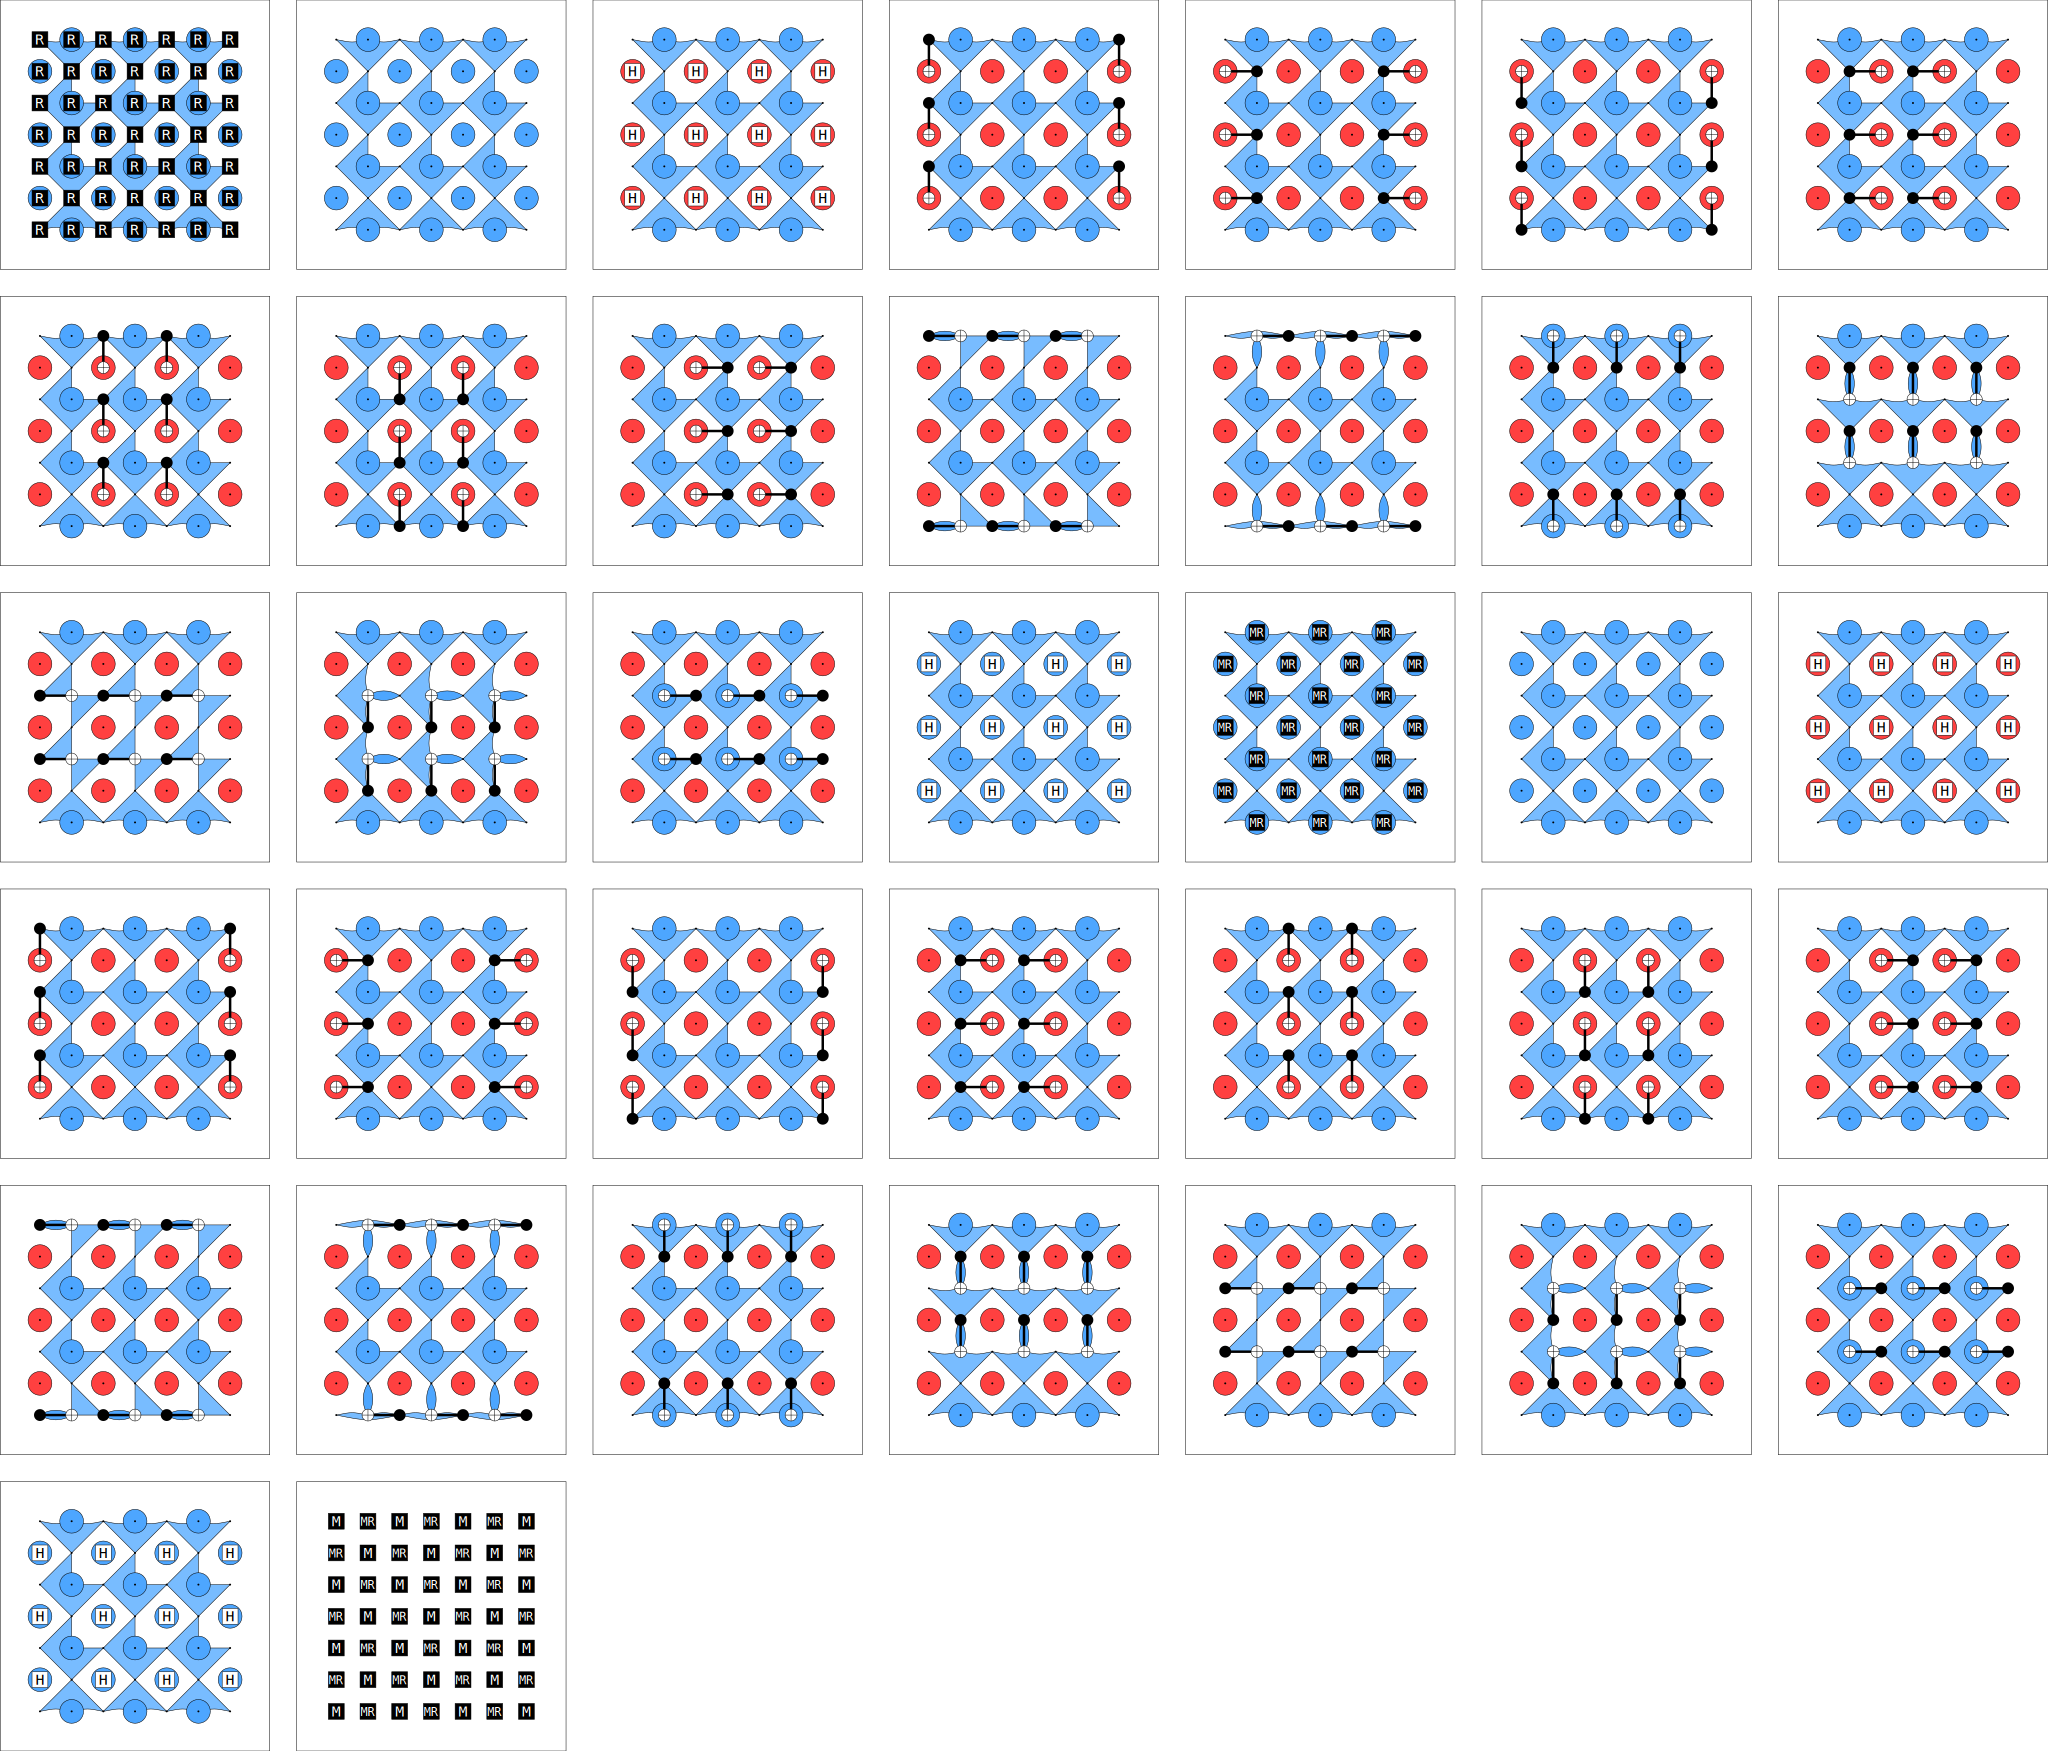

In [10]:
circuit.without_noise().diagram(
    "detslice-with-ops-svg", 
    tick=range(0, 50),
)

In [11]:
circuit.diagram("matchgraph-3d")

{"accessors":[{"bufferView":0,"byteOffset":0,"componentType":5126,"count":17,"max":[0,0.400000005960464,0.400000005960464],"min":[0,-0.400000005960464,-0.400000005960464],"name":"circle_loop","type":"VEC3"},{"bufferView":1,"byteOffset":0,"componentType":5126,"count":602,"max":[28,26.3205032348633,10.082483291626],"min":[-10,-8.32050228118896,-4.08248281478882],"name":"buf_scattered_lines","type":"VEC3"},{"bufferView":2,"byteOffset":0,"componentType":5126,"count":80,"max":[26.0178375244141,26.3205032348633,10.082483291626],"min":[-8.01783752441406,-8.32050228118896,-4.08248281478882],"name":"buf_red_scattered_lines","type":"VEC3"}],"asset":{"version":"2.0"},"bufferViews":[{"buffer":0,"byteLength":204,"byteOffset":0,"name":"circle_loop","target":34962},{"buffer":1,"byteLength":7224,"byteOffset":0,"name":"buf_scattered_lines","target":34962},{"buffer":2,"byteLength":960,"byteOffset":0,"name":"buf_red_scattered_lines","target":34962}],"buffers":[{"byteLength":204,"name":"circle_loop","uri":"data:application/octet-stream;base64,AAAAAM3MzD4AAAAAAAAAAOU1vT5Fvxw+AAAAAMPQkD7D0JA+AAAAAES/HD7lNb0+AAAAAPIwlrLNzMw+AAAAAEe/HL7lNb0+AAAAAMPQkL7D0JA+AAAAAOc1vb5Avxw+AAAAAM3MzL7yMBazAAAAAOU1vb5Evxy+AAAAAMHQkL7E0JC+AAAAADy/HL7nNb2+AAAAAPLkozHNzMy+AAAAAEm/HD7kNb2+AAAAAMbQkD6/0JC+AAAAAOY1vT5Evxy+AAAAAM3MzD4AAAAA"},{"byteLength":7224,"name":"buf_scattered_lines","uri":"data:application/octet-stream;base64,AAAAAAAAQEAAAAAAAAAAAAAAEEEAAAAAAAAAAAAAQEAAAAAAAAAAAAAAEEEAAAAAAADAQAAAQEAAAEBADJHDP3o3vsAAAEBAAAAAAAAAQEAAAAAAAADAQAAAQEAAAAAAAAAAAAAAQEAAAAAAAADAQAAAQEAAAAAAAADAQAAAQEAAAEBADJHDP3o3vsAAAEBAAAAAAAAAQEAAAAAAAADAQAAAQEAAAAAAAAAAAAAAQEAAAEBAxyAFwRQCI8AAAEBAAAAAAAAAQEAAAAAAAAAQQQAAAAAAAEBAAAAAAAAAQEAAAAAAAABAQAAAAAAAAEBAAAAAAAAAQEAAAEBAxyAFwRQCI8AAAEBAAAAAAAAAEEEAAAAAAAAAAAAAcEEAAAAAAAAAAAAAEEEAAAAAAAAAAAAAcEEAAAAAAABAQQAAQEAAAEBA78aDQXo3vsAAAEBAAAAAAAAAEEEAAAAAAADAQAAAEEEAAAAAAAAAAAAAEEEAAAAAAADAQAAAEEEAAAAAAABAQQAAQEAAAEBA78aDQXo3vsAAAEBAAAAAAAAAEEEAAAAAAADAQAAAEEEAAAAAAADAQAAAQEAAAEBADJHDP3o3vsAAAEBAAAAAAAAAEEEAAAAAAABwQQAAAAAAAEBAAAAAAAAAEEEAAAAAAAAQQQAAAAAAAEBAAAAAAAAAEEEAAAAAAABAQAAAAAAAAEBAAAAAAAAAcEEAAAAAEEkAwQXDokEVDCvAAAAAAAAAcEEAAAAAAADAQAAAcEEAAAAAAAAAAAAAcEEAAAAAAADAQAAAcEEAAAAAAACQQQAAQEAAAEBAZJDSQRQCI8AAAEBAAAAAAAAAcEEAAAAAAADAQAAAcEEAAAAAAABAQQAAQEAAAEBA78aDQXo3vsAAAEBAAAAAAAAAcEEAAAAAAABwQQAAAAAAAEBAAAAAAAAAcEEAAAAAAAAQQQAAAAAAAEBAAAAAAAAAcEEAAAAAEEkAwQXDokEVDCvAAACQQQAAQEAAAEBAZJDSQRQCI8AAAEBAAADAQAAAQEAAAAAAAADAQAAAEEEAAAAAAADAQAAAQEAAAAAAAADAQAAAEEEAAAAAAADAQAAAEEEAAEBAAACAwAAAEEEAAEBAAADAQAAAQEAAAAAAAADAQAAAEEEAAAAAAADAQAAAQEAAAEBADJHDP3o3vsAAAEBAAADAQAAAQEAAAAAAAABAQQAAQEAAAAAAAADAQAAAQEAAAAAAAABAQQAAQEAAAAAAAADAQAAAEEEAAEBAAACAwAAAEEEAAEBAAADAQAAAQEAAAAAAAABAQQAAQEAAAAAAAAAAAAAAEEEAAEBAAAAgwQAAEEEAAEBAAADAQAAAQEAAAAAAAAAQQQAAwEAAAEBAAADAQAAAQEAAAAAAAABAQAAAQEEAAEBAAADAQAAAQEAAAAAAAABAQAAAwEAAAEBAAADAQAAAQEAAAAAAAABAQAAAAAAAAEBAAAAAAAAAEEEAAEBAAAAgwQAAEEEAAEBAAAAAAAAAQEAAAEBAxyAFwRQCI8AAAEBAAADAQAAAEEEAAAAAAADAQAAAcEEAAAAAAADAQAAAEEEAAAAAAADAQAAAcEEAAAAAAABAQQAAEEEAAEBAAACwQQAAEEEAAEBAAADAQAAAEEEAAAAAAADAQAAAcEEAAAAAAABAQQAAQEAAAEBA78aDQXo3vsAAAEBAAADAQAAAEEEAAAAAAABAQQAAEEEAAAAAAADAQAAAEEEAAAAAAABAQQAAEEEAAAAAAABAQQAAEEEAAEBAAACwQQAAEEEAAEBAAADAQAAAEEEAAAAAAABAQQAAEEEAAAAAAADAQAAAEEEAAEBAAACAwAAAEEEAAEBAAADAQAAAEEEAAAAAAABwQQAAwEAAAEBAAADAQAAAEEEAAAAAAAAQQQAAQEEAAEBAAADAQAAAEEEAAAAAAAAQQQAAwEAAAEBAAADAQAAAEEEAAAAAAAAQQQAAAAAAAEBAAADAQAAAcEEAAAAANHH1P9pRuUGzo4LAAADAQAAAcEEAAAAAAABAQQAAcEEAAAAAAADAQAAAcEEAAAAAAABAQQAAcEEAAAAAAACQQQAAEEEAAEBAAADgQQAAEEEAAEBAAADAQAAAcEEAAAAAAABAQQAAcEEAAAAAAABAQQAAEEEAAEBAAACwQQAAEEEAAEBAAADAQAAAcEEAAAAAAABwQQAAQEEAAEBAAADAQAAAcEEAAAAAAABwQQAAwEAAAEBAAADAQAAAcEEAAAAAAABwQQAAAAAAAEBAAADAQAAAcEEAAAAANHH1P9pRuUGzo4LAAACQQQAAEEEAAEBAAADgQQAAEEEAAEBAAADAQAAAcEEAAAAANHH1P9pRuUGzo4LAAACQQQAAQEAAAEBAZJDSQRQCI8AAAEBAAABAQQAAQEAAAAAAAABAQQAAEEEAAAAAAABAQQAAQEAAAAAAAABAQQAAEEEAAAAAAADAQAAAcEEAAEBADJHDP96Nv0EAAEBAAABAQQAAQEAAAAAAAABAQQAAEEEAAAAAAADAQAAAEEEAAEBAAACAwAAAEEEAAEBAAABAQQAAQEAAAAAAAACQQQAAQEAAAAAAAA

In [14]:
surface_code_tasks = [
    sinter.Task(
        circuit = stim.Circuit(
            generate_circuit(
                rounds=3*4,
                after_clifford_depolarization=noise,
                after_reset_flip_probability=noise,
                before_measure_flip_probability=noise,
                before_round_data_depolarization=noise,
            )
        ),
        json_metadata={'d': d, 'r': d * 3, 'p': noise},
    )
    for d in [4,5,6]
    for noise in [0.0001,0.005,0.001,0.01,0.02,0.03,0.06,0.09,0.1,0.2,0.3]
]

collected_surface_code_stats: List[sinter.TaskStats] = sinter.collect(
    num_workers=4,
    tasks=surface_code_tasks,
    decoders=['pymatching'],
    max_shots=1_000_000,
    max_errors=5_000,
    print_progress=True,
)

Starting 4 workers...
32 cases left:
    pymatching processes=2  ~core_mins_left=1       shots_left=961300   errors_left=3215    {d=4,p=0.005,r=12}
    pymatching processes=2  ~core_mins_left=1       shots_left=927100   errors_left=4904    {d=4,p=0.001,r=12}
    pymatching processes=0  ~core_mins_left=1       shots_left=999900   errors_left=4978    {d=4,p=0.01,r=12}
26 cases left:
    pymatching processes=3  ~core_mins_left=1       shots_left=996700   errors_left=3371    {d=4,p=0.09,r=12}
    pymatching processes=1  ~core_mins_left=1       shots_left=999100   errors_left=4545    {d=4,p=0.1,r=12}
23 cases left:
    pymatching processes=1  ~core_mins_left=1       shots_left=994131   errors_left=2079    {d=4,p=0.3,r=12}
    pymatching processes=1  ~core_mins_left=1       shots_left=437400   errors_left=4995    {d=5,p=0.0001,r=15}
    pymatching processes=2  ~core_mins_left=1       shots_left=975700   errors_left=3777    {d=5,p=0.005,r=15}
16 cases left:
    pymatching processes=3  ~core_m

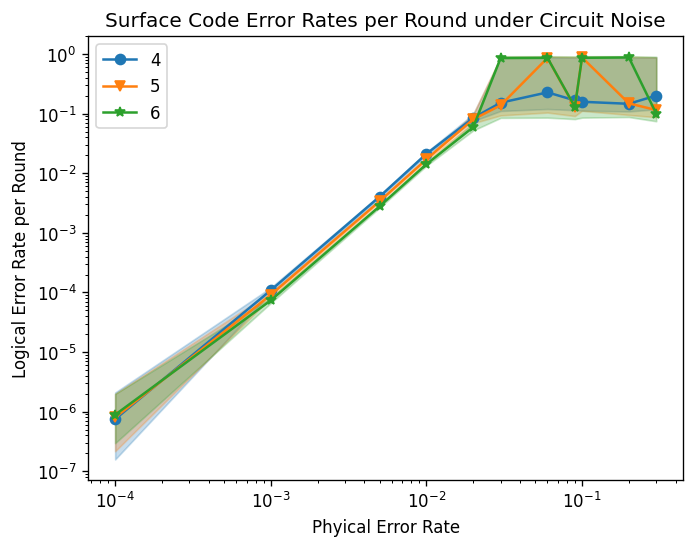

In [15]:
fig, ax = plt.subplots(1, 1)
sinter.plot_error_rate(
    ax=ax,
    stats=collected_surface_code_stats,
    x_func=lambda stat: stat.json_metadata['p'],
    group_func=lambda stat: stat.json_metadata['d'],
    failure_units_per_shot_func=lambda stat: stat.json_metadata['r'],
)
# ax.set_ylim(5e-3, 5e-2)
# ax.set_xlim(0.0001, 0.5)
ax.loglog()
ax.set_title("Surface Code Error Rates per Round under Circuit Noise")
ax.set_xlabel("Phyical Error Rate")
ax.set_ylabel("Logical Error Rate per Round")
# ax.grid(which='major')
# ax.grid(which='minor')
ax.legend()
fig.set_dpi(120)  # Show it bigger

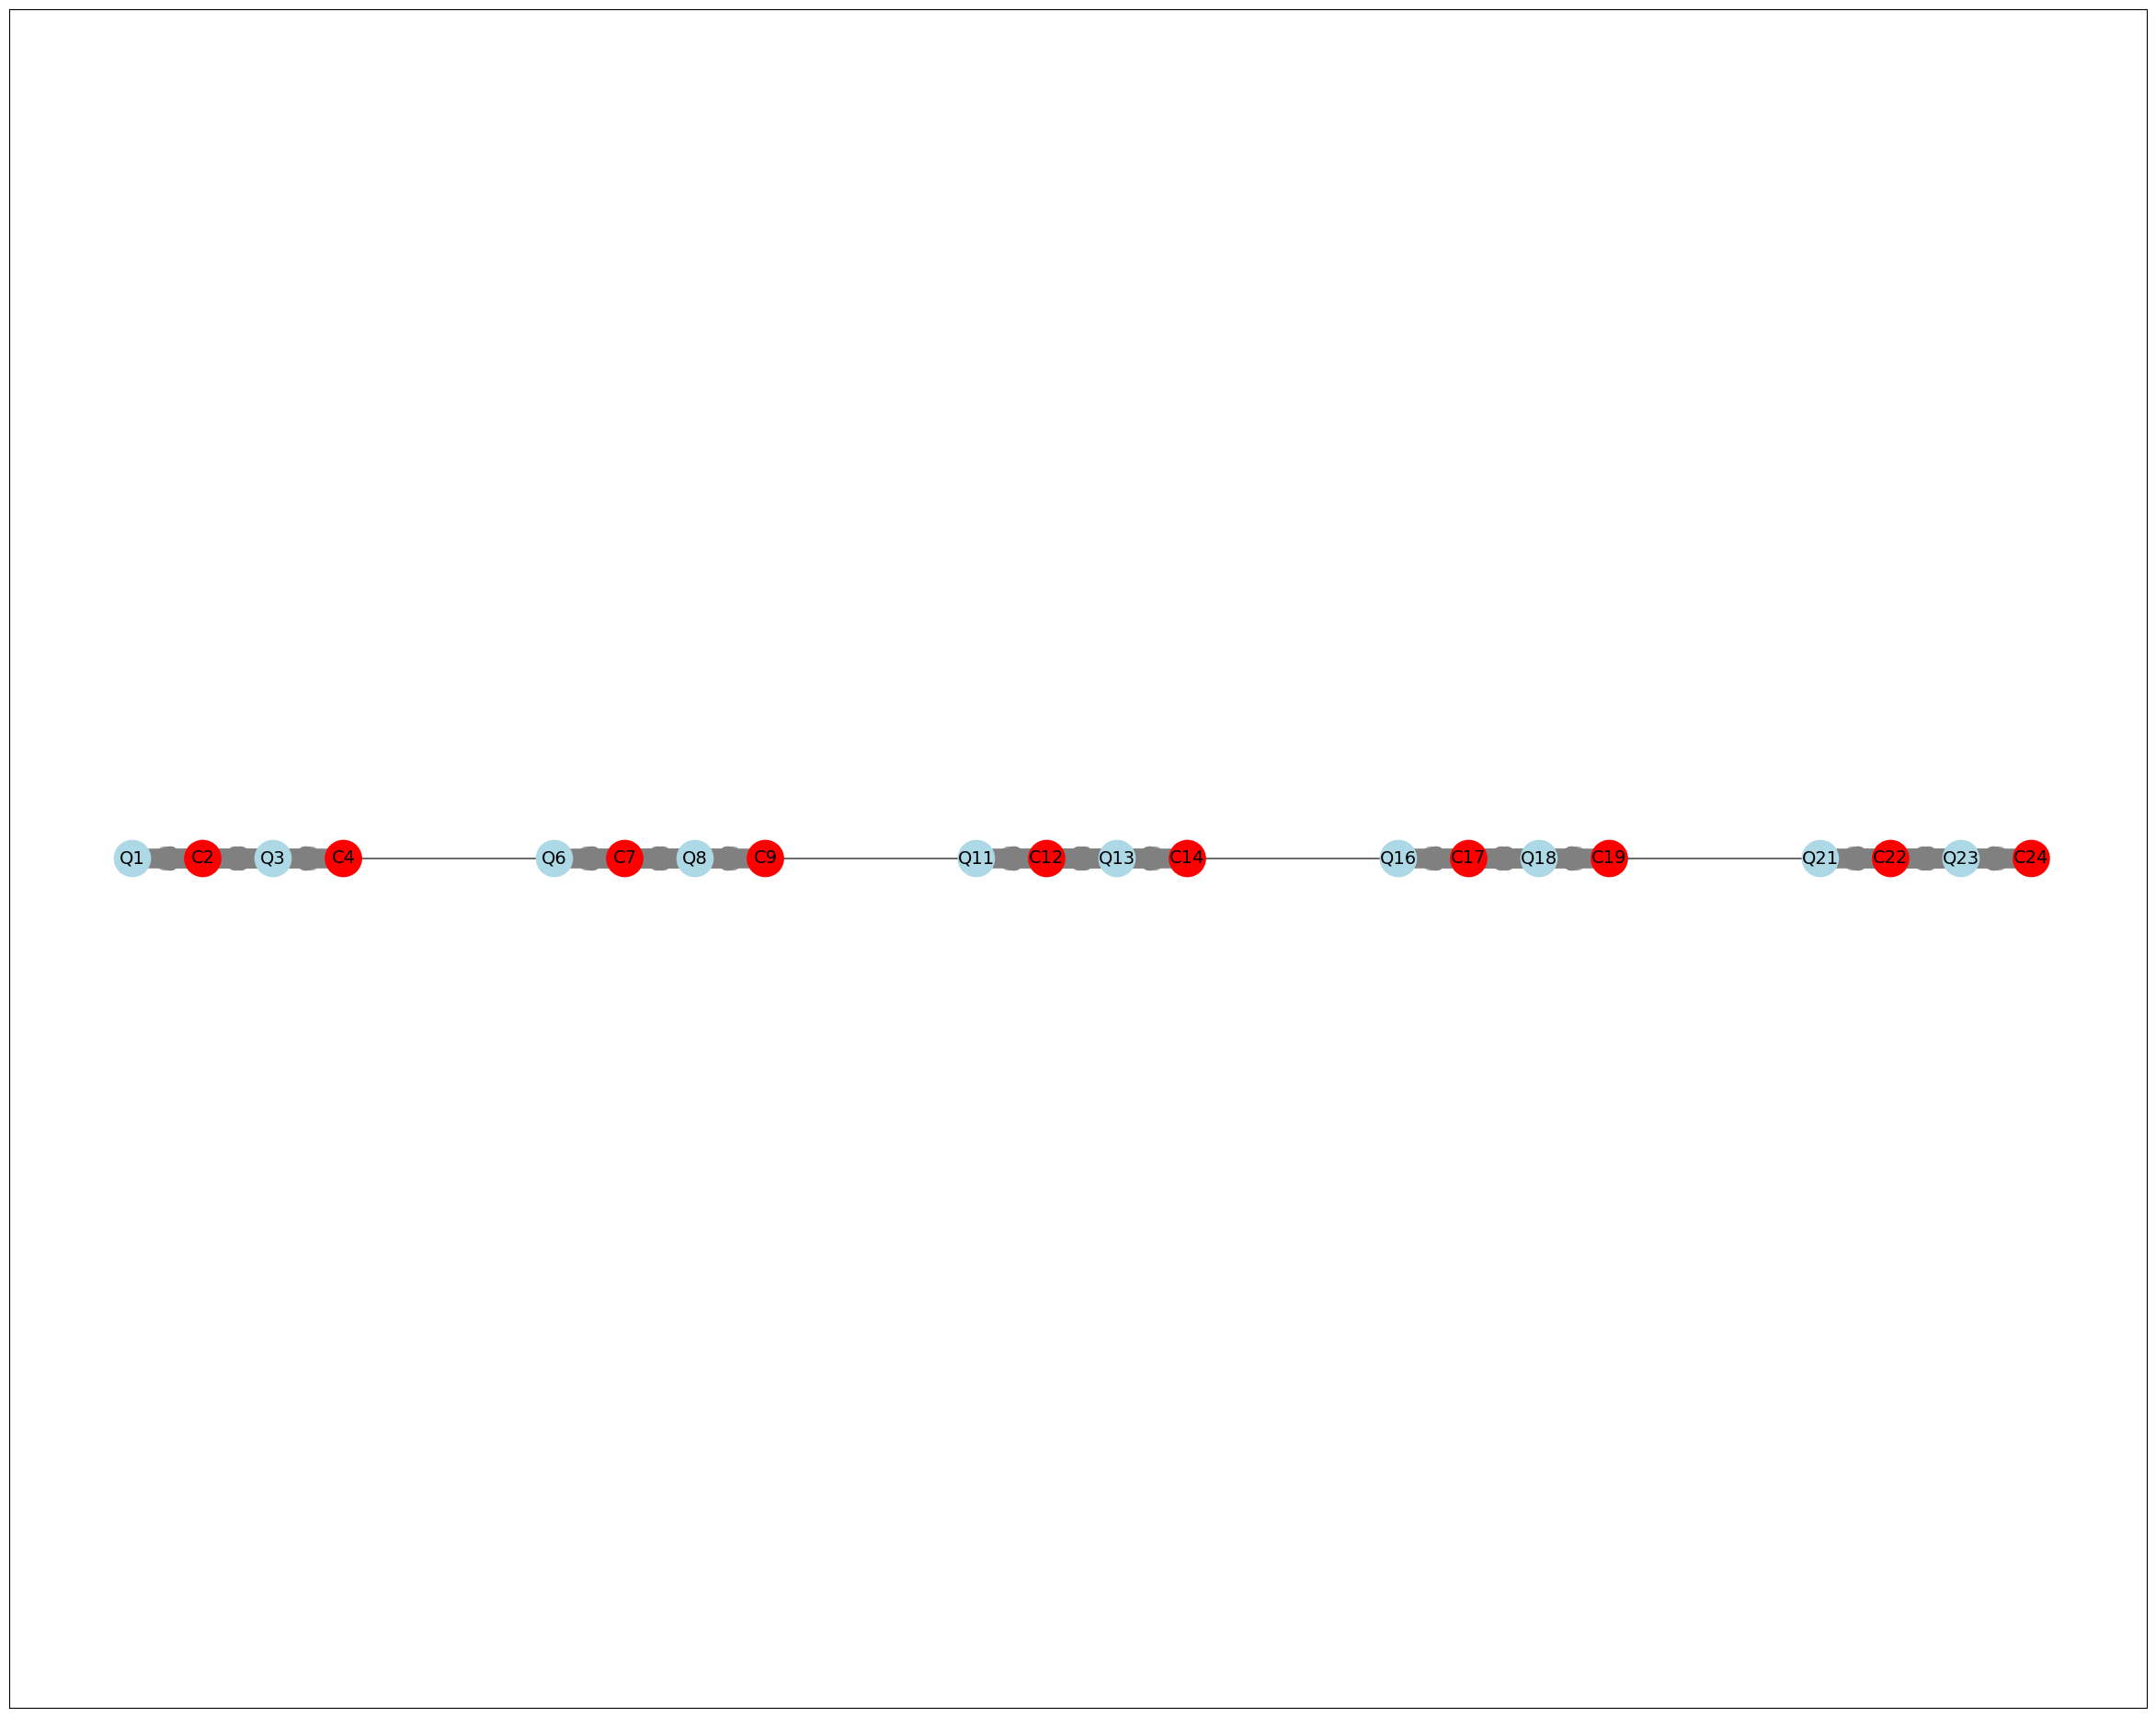

In [1]:
from qccd_summer import *

# Create architecture
arch = QCCDArch()

ionspacing = 5
trapspacing = 30
cooling_colour = 'red'
qubit_colour = 'lightblue'
traps = []

for i in range(5):
    ions = [QubitIon(qubit_colour, 'Q'), CoolingIon(cooling_colour, 'C'), QubitIon(qubit_colour, 'Q'), CoolingIon(cooling_colour, 'C')]
    trap = arch.addManipulationTrap(x=i *trapspacing, y=0, ions=ions, color='grey', spacing=ionspacing, isHorizontal=True)
    traps.append(trap)

for t1, t2 in zip(traps[:-1], traps[1:]):
    arch.addEdge(t1, t2)

arch.refreshGraph()
fig, ax = plt.subplots()
# Display architecture
arch.display(fig,ax, showLabels=False)





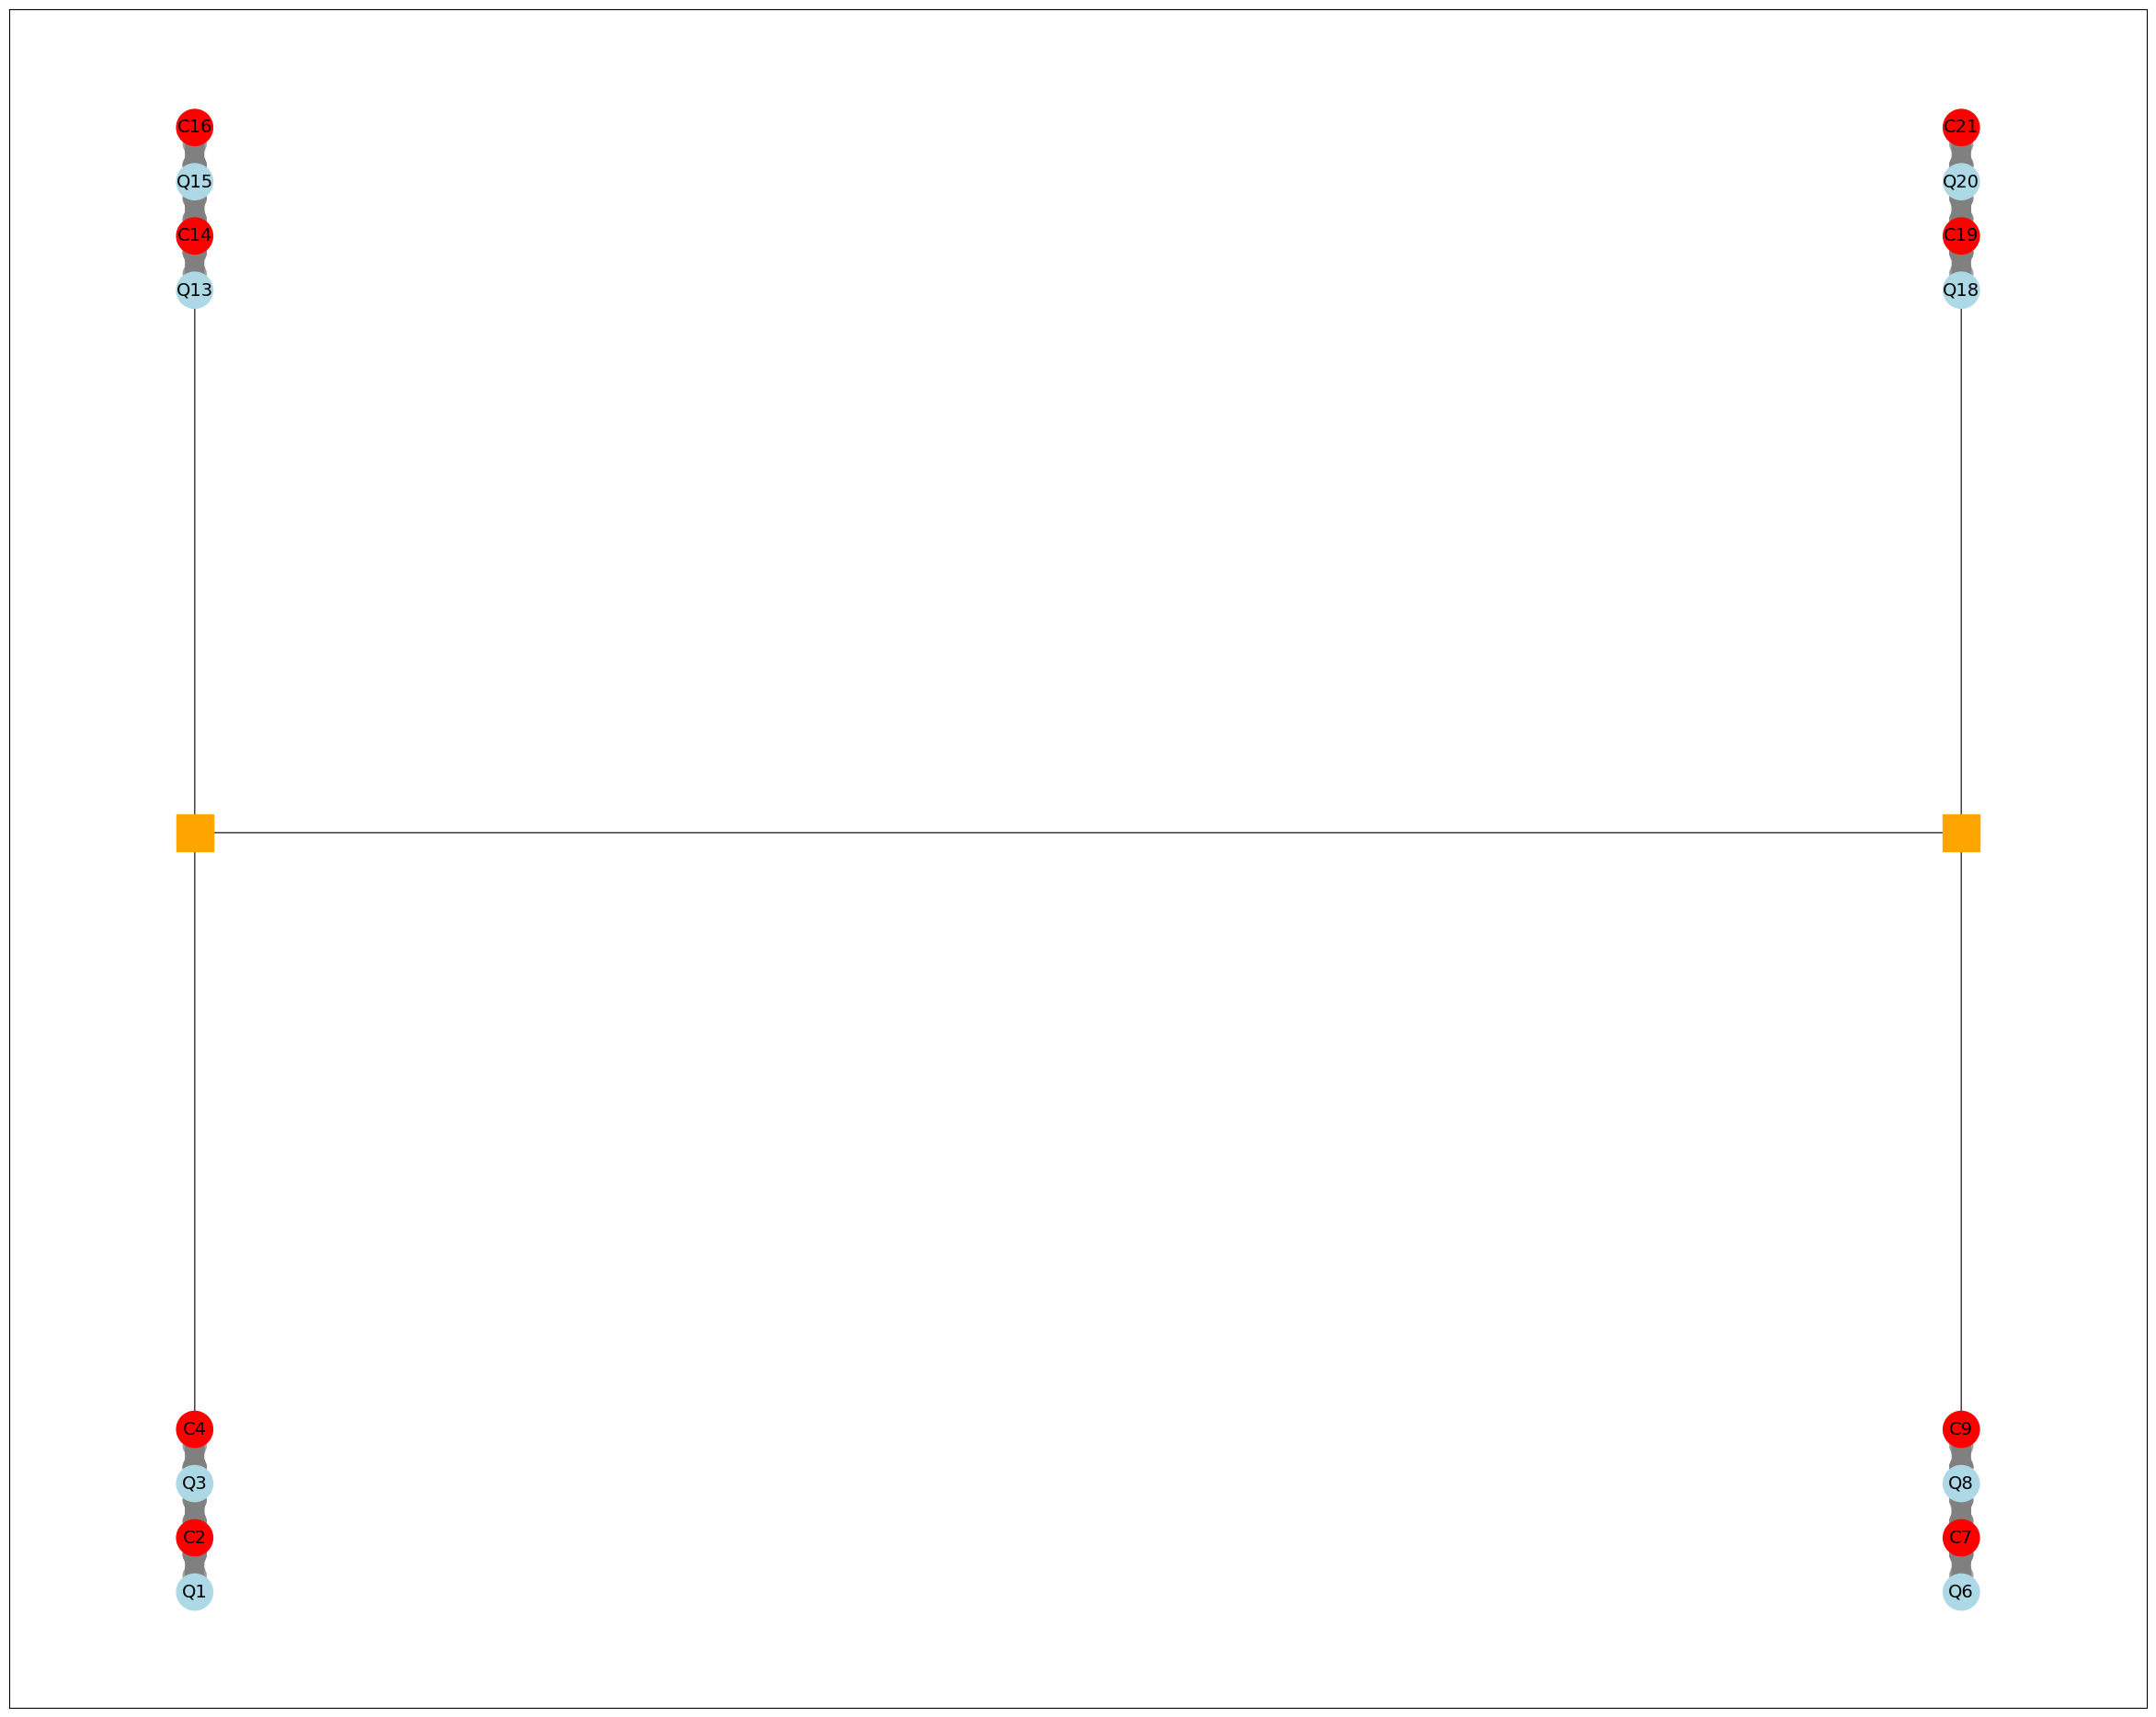

In [3]:
from qccd_summer import *


# Create architecture
arch = QCCDArch()

ionspacing = 1
trapspacing = 6
cooling_colour = 'red'
qubit_colour = 'lightblue'
junction_colour = 'orange'
traps = []

ManipulationTrap.DEFAULT_SPACING = trapspacing
arch.SIZING = 0.5
ions11 = [QubitIon(qubit_colour, 'Q'), CoolingIon(cooling_colour, 'C'), QubitIon(qubit_colour, 'Q'), CoolingIon(cooling_colour, 'C')]
trap11 = arch.addManipulationTrap(x=0, y=0, ions=ions11, color='grey', spacing=ionspacing, isHorizontal=False)

ions12 = [QubitIon(qubit_colour, 'Q'), CoolingIon(cooling_colour, 'C'), QubitIon(qubit_colour, 'Q'), CoolingIon(cooling_colour, 'C')]
trap12 = arch.addManipulationTrap(x=trapspacing, y=0, ions=ions12, color='grey', spacing=ionspacing, isHorizontal=False)

junctionL = arch.addJunction(x=0, y=trapspacing, color=junction_colour)
junctionR = arch.addJunction(x=trapspacing, y=trapspacing, color=junction_colour)

ions21 = [QubitIon(qubit_colour, 'Q'), CoolingIon(cooling_colour, 'C'), QubitIon(qubit_colour, 'Q'), CoolingIon(cooling_colour, 'C')]
trap21 = arch.addManipulationTrap(x=0, y=2*trapspacing, ions=ions21, color='grey', spacing=ionspacing, isHorizontal=False)

ions22 = [QubitIon(qubit_colour, 'Q'), CoolingIon(cooling_colour, 'C'), QubitIon(qubit_colour, 'Q'), CoolingIon(cooling_colour, 'C')]
trap22 = arch.addManipulationTrap(x=trapspacing, y=2*trapspacing, ions=ions22, color='grey', spacing=ionspacing, isHorizontal=False)

crossing11 = arch.addEdge(trap11, junctionL)
arch.addEdge(trap12, junctionR)
crossing21 = arch.addEdge(trap21, junctionL)
arch.addEdge(trap22, junctionR)
arch.addEdge(junctionL, junctionR)

arch.refreshGraph()
# Display architecture


ops = (
    Split.physicalOperation(trap11, crossing11), 
    Move.physicalOperation(crossing11),
    JunctionCrossing.physicalOperation(junctionL, crossing11),
    JunctionCrossing.physicalOperation(junctionL, crossing21),
    Move.physicalOperation(crossing21),
    Merge.physicalOperation(trap21, crossing21),
    GateSwap.physicalOperation(trap=trap21, ion1=ions21[0], ion2=ions21[2]),
    TwoQubitMSGate.physicalOperation(ion1=ions22[0], ion2=ions22[2],trap=trap22),
    OneQubitGate.physicalOperation(ion=ions12[0], trap=trap12),
    Measurement.physicalOperation(ion=ions12[0], trap=trap12),
    QubitReset.physicalOperation(ion=ions12[0],trap=trap12))
parallelOps = paralleliseOperations(ops)

ncols = 2
fig, ax = plt.subplots()
arch.display(fig, ax, showLabels=False)
fig.set_size_inches(arch.WINDOW_SIZE[0], arch.WINDOW_SIZE[1])
fig,axs = plt.subplots(int(len(parallelOps)/2), 2)
axs = axs.flatten()
for i, (ax, parallelOp)in enumerate(zip(axs, parallelOps)):
    parallelOp.run()
    arch.refreshGraph()
    arch.display(fig=fig, ax=ax, title=parallelOp.label, operation=parallelOp, showLabels=False)

fig.set_size_inches(arch.WINDOW_SIZE[0]*2, arch.WINDOW_SIZE[1]*int(len(parallelOps)/2))



number of qubit operations: 65
number of operations: 90
number of time steps: 61


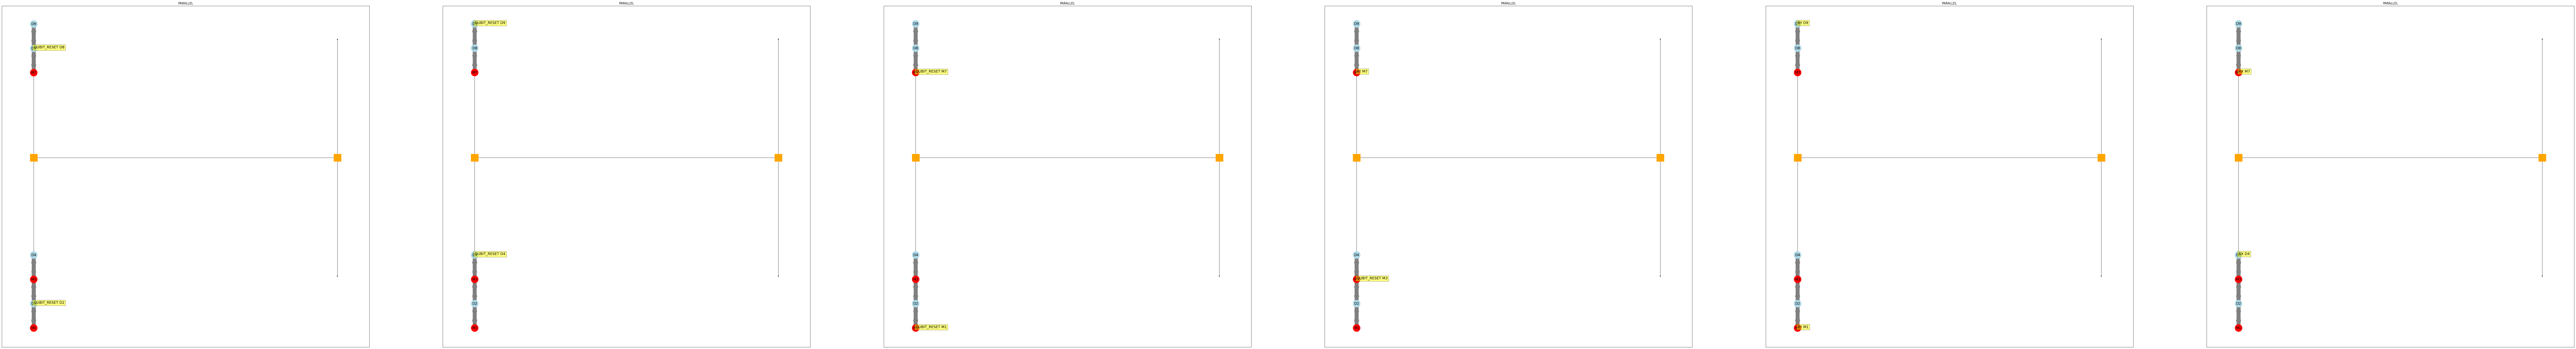

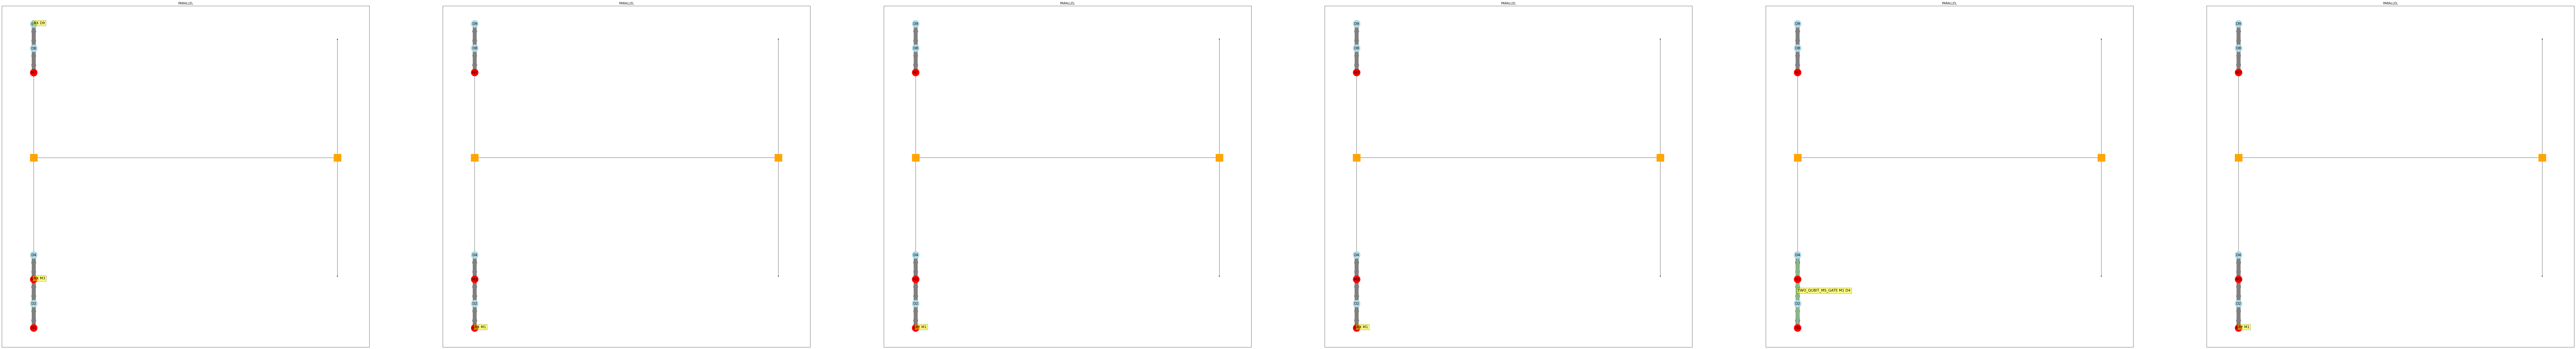

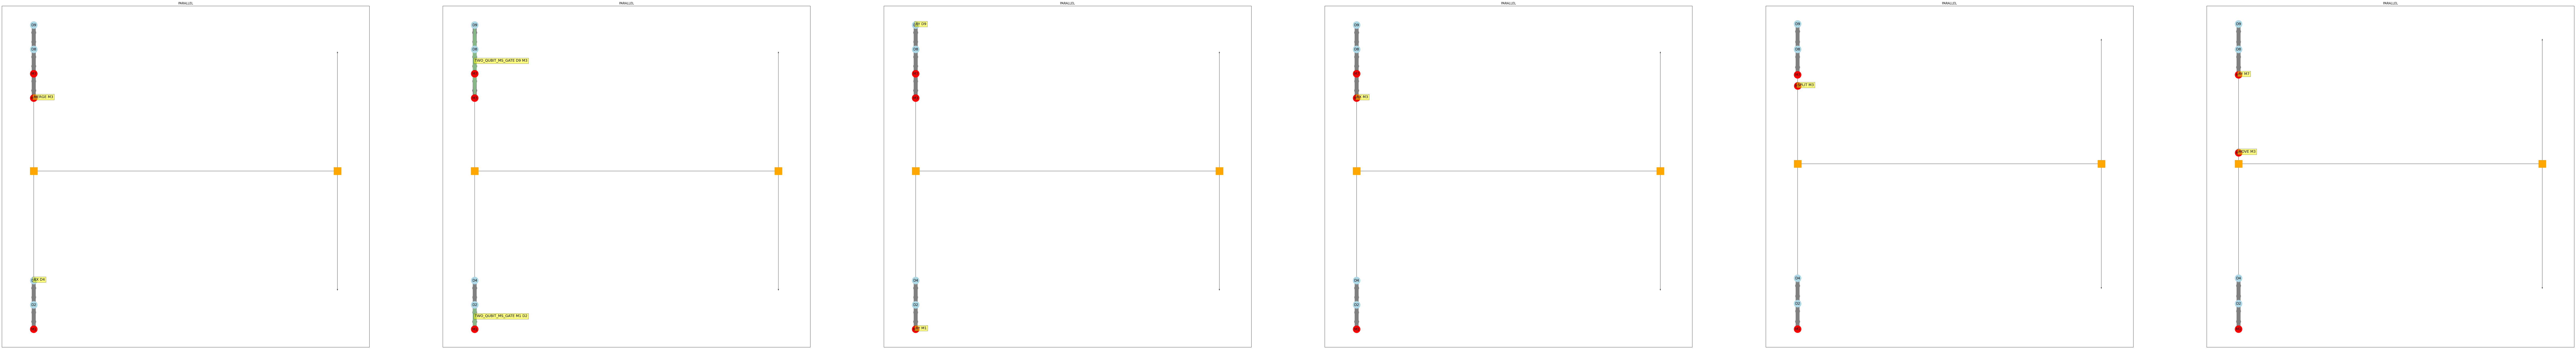

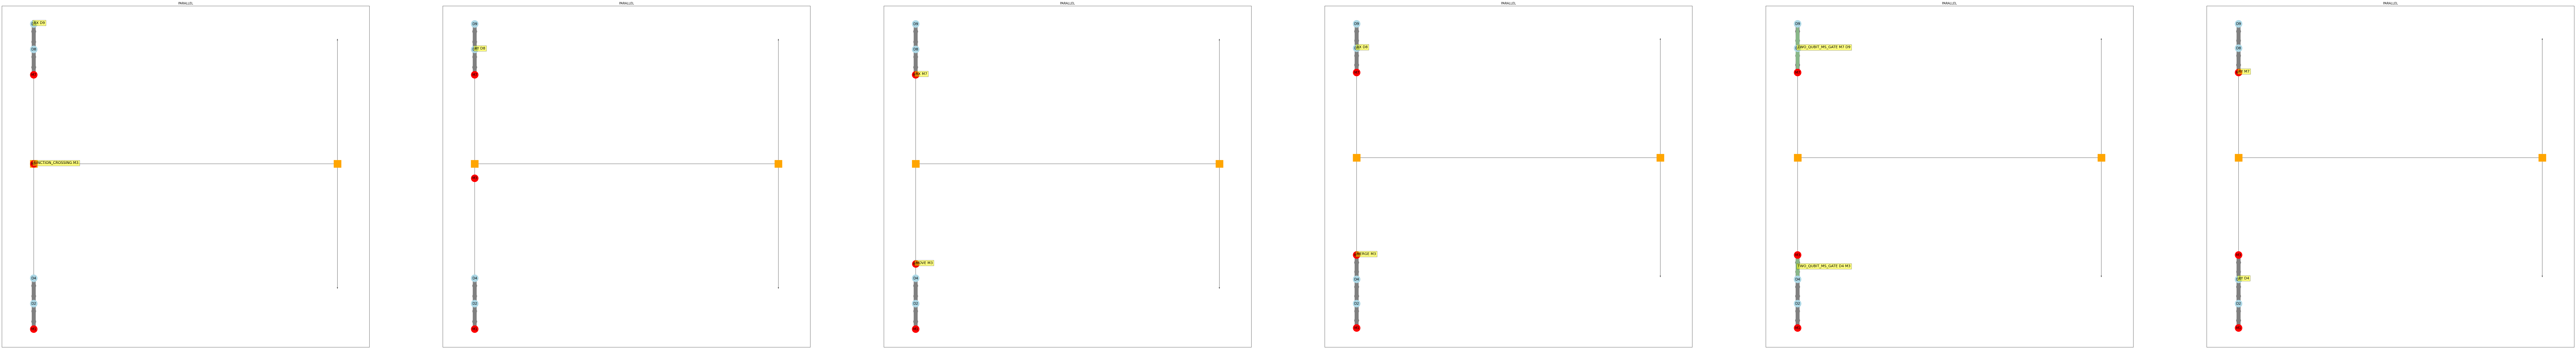

In [1]:
from qccd_summer import *

noise=0.01
circuit = QCCDCircuit.generated(
    "surface_code:rotated_memory_z",
    rounds=1,
    distance=2,
    after_clifford_depolarization=noise,
    after_reset_flip_probability=noise,
    before_measure_flip_probability=noise,
    before_round_data_depolarization=noise,
)
arch, instructions = circuit.processCircuit(rows=2, cols=2, trapCapacity=4)

arch.refreshGraph()

allOps = arch.processOperations(instructions)
parallelOps = paralleliseOperations(allOps)

arch = circuit.resetArch()

timeSteps=0

axsPerFig = 6
figs = []
axs = []
numFigs = int(len(parallelOps)/(axsPerFig))+int((len(parallelOps)%(axsPerFig))>0)
for _ in range(numFigs):
    fig, axs_ = plt.subplots(1, axsPerFig, sharex=False, sharey=False)
    figs.extend([fig]*axsPerFig)
    axs.extend(axs_)
figs = figs[:len(parallelOps)]
axs = axs[:len(parallelOps)]

for fig, ax, parallelOp in zip(figs, axs, parallelOps):
    arch.display(fig, ax, parallelOp.label, operation=parallelOp, runOps=True, showLabels=False)
    timeSteps+=1
  
print(f"number of qubit operations: {len(instructions)}")
print(f"number of operations: {len(allOps)}")
print(f"number of time steps: {timeSteps}")
